In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# preprocessing
import re
import string
import itertools # for flattening
# nltk library
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer as wn
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.util import ngrams
nltk.download('punkt', quiet=True)
nltk.download('stopwords')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# sklearn library
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
#modeling and dimensionality reduction for visuaization
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

[nltk_data] Downloading package stopwords to /Users/Shen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/Shen/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Shen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Shen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [6]:
new_df=pd.read_pickle('cleanedfile_dicejob.pickle')

In [7]:
new_df.head()

,advertiserurl,company,employmenttype_jobstatus,jd_old,jobid,joblocation_address,jobtitle,postdate,shift,skills,uniq_id,jobdescription,cleaned_jd,cleanedjd,bigramtexts,trigramtexts,joined_bigram,joined_trigram
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4,SEE BELOW Looking for Selenium engineers...mus...,look selenium engineer solid java cod skill se...,"[look, selenium, engineer, solid, java, cod, s...","[look, selenium, engineer, solid, java, cod, s...","[look, selenium, engineer, solid, java, cod, s...",look selenium engineer solid java cod skill se...,look selenium engineer solid java cod skill se...
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9,"linux/unix, network monitoring, incident respo...",network monitor incident response system admin...,"[network, monitor, incident, response, system,...","[network, monitor, incident_response, system, ...","[network, monitor, incident_response, system, ...",network monitor incident_response system admin...,network monitor incident_response system admin...
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72,"Enterprise Solutions Architecture, business in...",enterprise solution architecture business inte...,"[enterprise, solution, architecture, business,...","[enterprise, solution, architecture, business,...","[enterprise, solution, architecture, business,...",enterprise solution architecture business inte...,enterprise solution architecture business inte...
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,Please see job description,3941b2f206ae0f900c4fba4ac0b18719,Please see job description Java DeveloperFull-...,java il client lead edge software development ...,"[java, il, client, lead, edge, software, devel...","[java, il, client, lead, edge, software, devel...","[java, il, client, lead, edge, software, devel...",java il client lead edge software development ...,java il client lead edge software development ...
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7,"Configuration Management, Developer, Linux, Ma...",configuration management developer linux manag...,"[configuration, management, developer, linux, ...","[configuration, management, developer, linux, ...","[configuration, management, developer, linux, ...",configuration management developer linux manag...,configuration management developer linux manag...


In [8]:
new_df=new_df.dropna()

## TDIDF vectorizer 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorized_col = new_df['joined_bigram']
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(vectorized_col)
X_train

<21542x92531 sparse matrix of type '<class 'numpy.float64'>'
	with 2579865 stored elements in Compressed Sparse Row format>

## NLTK NMF

In [11]:
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

topic_model = NMF(n_components = 10)
topic_model.fit(X_train)

NMF(n_components=10)

In [12]:
H = topic_model.transform(X_train) # transform document into topic vector representation

# to get W 
W = topic_model.components_ # word component weights for each topic

print("Shape of W is " + str(W.shape))
print("Shape of H is " + str(H.shape))
print("Shape of X_train is " + str(X_train.shape))

Shape of W is (10, 92531)
Shape of H is (21542, 10)
Shape of X_train is (21542, 92531)


In [13]:
for index,topic in enumerate(W):
    print(f'THE TOP 25 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 25 WORDS FOR TOPIC #0
['communication', 'implementation', 'include', 'skill', 'scope', 'lead', 'team', 'program', 'budget', 'ability', 'stakeholder', 'schedule', 'ensure', 'change', 'requirement', 'resource', 'technical', 'risk', 'process', 'plan', 'manage', 'business', 'manager', 'management', 'project']


THE TOP 25 WORDS FOR TOPIC #1
['engineer', 'work', 'ui', 'strong', 'architecture', 'product', 'mobile', 'build', 'service', 'spring', 'jquery', 'develop', 'code', 'technology', 'use', 'framework', 'year', 'application', 'developer', 'javascript', 'software', 'design', 'development', 'web', 'java']


THE TOP 25 WORDS FOR TOPIC #2
['equipment', 'knowledge', 'router_switch', 'voip', 'wan', 'hardware', 'engineering', 'technology', 'vpn', 'troubleshoot', 'networking', 'router', 'center', 'rout', 'design', 'ip', 'voice', 'protocol', 'switch', 'wireless', 'infrastructure', 'firewall', 'engineer', 'cisco', 'network']


THE TOP 25 WORDS FOR TOPIC #3
['process', 'use', 'tableau', 'que

#### Visualization

In [107]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 10, figsize=(18, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color='green',alpha=.5)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 12})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=12)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 5
tfidf_feature_names = vectorizer.get_feature_names()
plot_top_words(W, tfidf_feature_names, n_top_words, "Top Topics")

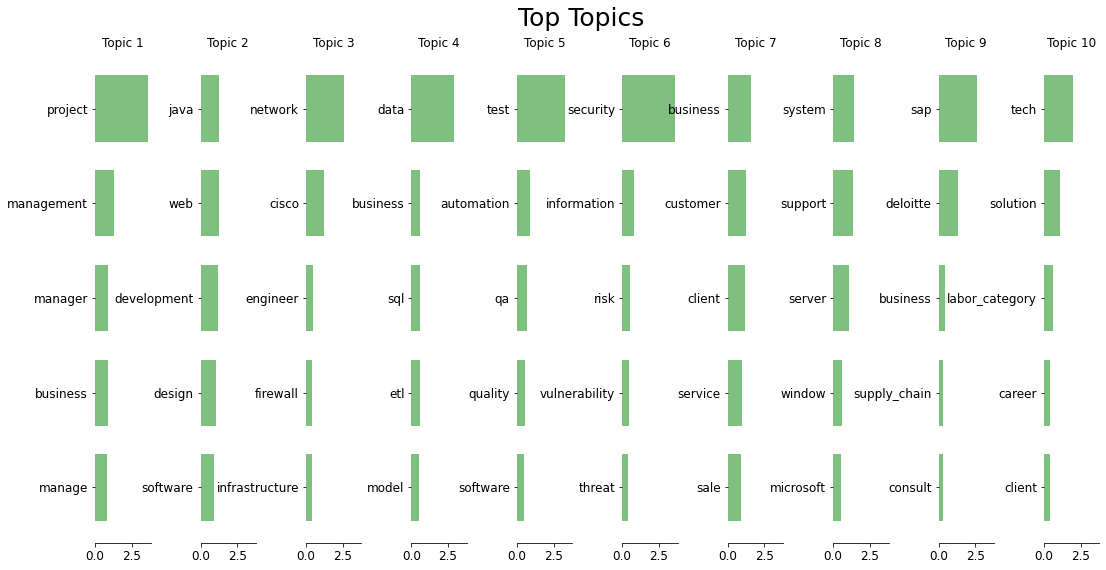

In [108]:
topic_word_plot()

In [24]:
topic_name_dict = {0: 'project_management', 1: 'java_web_developer', 2: 'network_engineer', 3: 'data_business_modeling', 4: 'qa_automation_test',5:'system_security',6:'busienss_client_service',7:'system_support',8:'deloitte_sap_consult',9:'tech_solutions'}

In [25]:
topic_keys = topic_name_dict.values()

In [110]:
list(zip(topic_name_dict.values(), list(H[5,:])))

[('project_management', 0.007511678699345403),
 ('java_web_developer', 0.0010445687803809884),
 ('network_engineer', 0.0008190629138727102),
 ('data_business_modeling', 0.0),
 ('qa_automation_test', 0.0),
 ('system_security', 0.0),
 ('busienss_client_service', 0.0006211844545373539),
 ('system_support', 0.0025924348681735983),
 ('deloitte_sap_consult', 0.031348762322766746),
 ('tech_solutions', 0.0008351858059919733)]

In [126]:
coefdistribution=pd.DataFrame(H, columns = topic_keys)


In [125]:
np.mean(coefdistribution.project_management)

0.011319656302415356

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'project_management'),
  Text(1, 0, 'java_web_developer'),
  Text(2, 0, 'network_engineer'),
  Text(3, 0, 'data_business_modeling'),
  Text(4, 0, 'qa_automation_test'),
  Text(5, 0, 'system_security'),
  Text(6, 0, 'busienss_client_service'),
  Text(7, 0, 'system_support'),
  Text(8, 0, 'deloitte_sap_consult'),
  Text(9, 0, 'tech_solutions')])

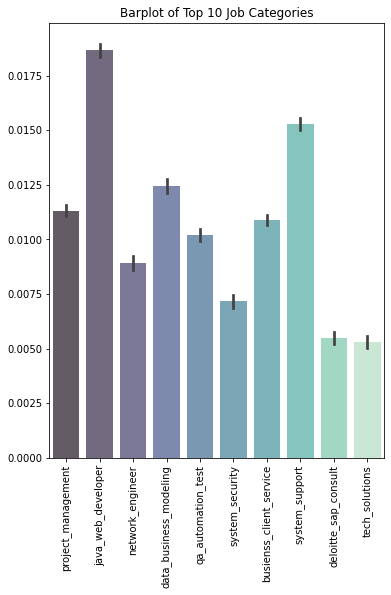

In [117]:
plt.figure(figsize=(6,8))
           
plt.title('Barplot of Top 10 Job Categories')

sns.barplot(data=coefdistribution, palette='mako',alpha=.7)

plt.xticks(rotation=90)

In [29]:
tsne = TSNE(random_state=42, learning_rate=100)
tsne_trans = tsne.fit_transform(H)
tsne_trans = pd.DataFrame(tsne_trans, columns = ['TSNE1', 'TSNE2'])

In [30]:
tsne_trans['class'] = np.argmax(H, axis = 1)
tsne_trans['class'] = tsne_trans['class'].replace(topic_name_dict)

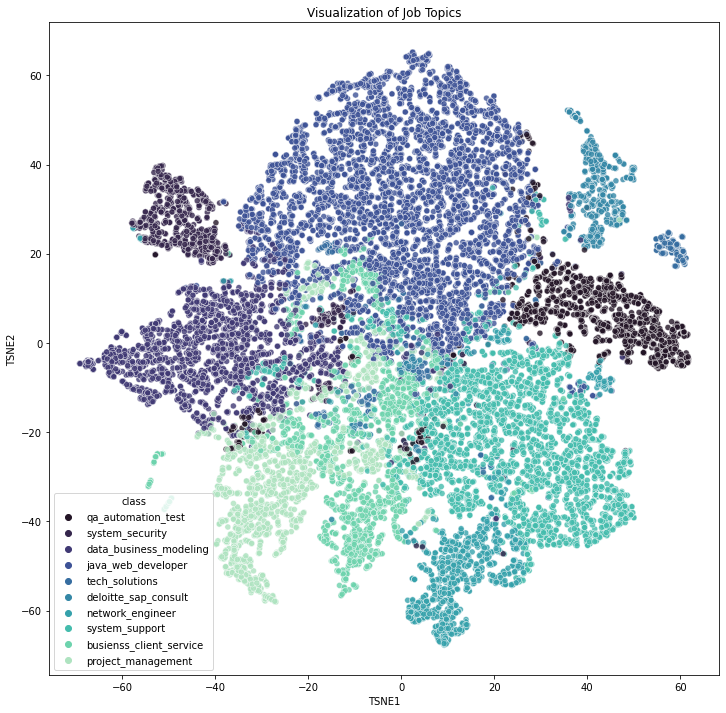

In [65]:
plt.figure(figsize=(12,12))
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'class', data = tsne_trans, palette = 'mako',alpha=.8)
plt.title('Visualization of Job Topics')
plt.show()

In [80]:
import pickle
with open("bestmodel.pkl", "wb") as f:
    pickle.dump(topic_model, f)

### Recommendation System - NLTK NMF

In [68]:
userinput=input()

project management, data analytics, data science, python, sql, machine learning, linear regression, logistic regression, NLP, data visualization, HR, human capital consultant, management, customer service, human resources, labour relations, strategy, entry level


In [69]:
new_df['jd_old']=new_df['jd_old'].drop_duplicates()

In [70]:
from nltk import WordNetLemmatizer # lemmatizer using WordNet
from nltk.corpus import wordnet # imports WordNet

In [71]:
def input_process(text):
    
    # get common stop words that we'll remove during tokenization/text normalization
    stop_words = stopwords.words('english')

    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
   

    # lower case everything
    txt_lower = text.lower()

    #remove mentions, hashtags, and urls, strip whitspace and breaks
    txt_lower = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "", txt_lower).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    
    #remove words with short length
    
    # remove stop words and punctuations 
    txt_norm = [x for x in word_tokenize(txt_lower) if ((x.isalpha()) & (x not in stop_words)) & (x not in ['good','great','found','company','lot','experience','fit','candidate','applicant','requirement','qualification','Deloitte','professional','year','application','opportunity','description','work','role','need','email','delivery',"req_id","job_req","req","id","please","resume","position","forward","receive","contact","minimum","required","disability","eligibility","employment","team","click"])]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    txt_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(txt_norm))) 

    # lemmatize the input
    txt_processed = " ".join([wnl.lemmatize(x[0], x[1]) for x in txt_tagged if x[1] is not None])
    return txt_processed
    
    



In [72]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/Shen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [73]:
userresume=input_process(userinput)

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer


resume_vec = vectorizer.transform([userresume])
resume_vec

<1x92531 sparse matrix of type '<class 'numpy.float64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [75]:
resume_transform=topic_model.transform(resume_vec)

In [76]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(X_train, resume_vec)


In [77]:
sim.argmax()

10785

In [78]:
dic = {}
for i,x in enumerate(sim):
  dic[i] = x

In [79]:
highest_sim = pd.DataFrame(dic).T.sort_values(by = 0, ascending = False).head(100).index


pd.DataFrame((new_df.iloc[highest_sim, :][['jobtitle','jobdescription',"company"]].values),columns=[["Job Title","Job Description","Company"]])

,Job Title,Job Description,Company
0,Manager HRIS/Payroll Systems and Operations,"HRIS systems, payroll systems Affinity Health ...",Affinity HealthPlan
1,Lead/Sr Data Scientist,"Machine Learning, Big Data, Java Title: Lead D...",BayOne Solutions
2,"Data Analytics, NJ","R, SAS, SQL, Python, statistical, visual analy...",Newt Global
3,Digital Data Management Lead,"data management, data governance, data archite...",Talus Partners
4,"Sr. Data Scientist - Machine Learning, Python,...","Data Science, Predictive Analytics, Machine Le...",Precision Systems
...,...,...,...
95,Data Engineer,"Data Science, Statistics, Data Analysis, Data ...",Rhode Island Quality Institute
96,"Executive Director, Implementation and Data Go...","Establish the Competency Center Strategy, Guid...","Blue Horizon Tek Solutions, Inc."
97,Big Data Engineer,"Big Data, Hadoop, Spark, Hive, Java, HDFS, Kaf...",Connections of New York
98,Big Data Engineer,Bachelor's Degree in Computer Science or equiv...,Execu/Search Group
